In [2]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt

In [3]:
img = imread("4k.jpg")

img.shape

(3744, 5616, 3)

In [4]:
X = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [12]:
_x = np.unique(X, axis=0)

_x.shape

(2508617, 3)

In [6]:

def get_train_random(X, size=1000):
    return X[np.random.choice(len(X), size)]

X_train = get_train_random(X)

In [7]:
kmean = KMeans(256)

kmean.fit(X_train)

KMeans(n_clusters=256)

In [8]:
labels = kmean.predict(X)

X_comp = kmean.cluster_centers_[labels]
X_comp = np.clip(X_comp.astype("uint8"), 0, 255)

X_comp.shape

(21026304, 3)

In [15]:
_X_comp_u = np.unique(X_comp, axis=0)

_X_comp_u.shape

(256, 3)

In [9]:
final_img = X_comp.reshape(img.shape[0], img.shape[1], img.shape[2])

final_img.shape

(3744, 5616, 3)

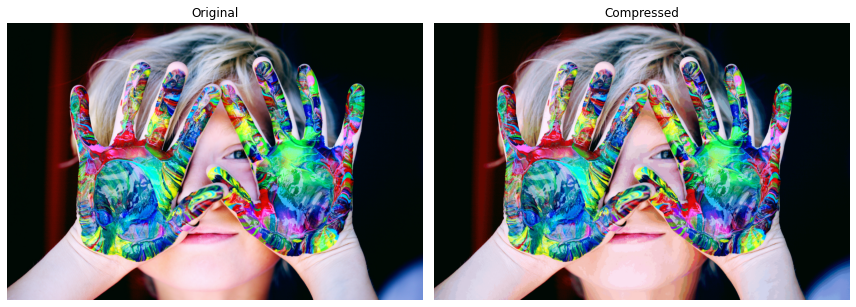

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(final_img)
ax[1].set_title("Compressed")

for i in fig.axes:
    i.axis("off")

plt.tight_layout()

In [11]:
# imsave("small_compressed.jpg", final_img)